In [1]:
from autqec.automorphisms import *
from autqec.ZX_dualities import *
from autqec.utils.qec import *
from autqec.utils.qiskit import *
from autqec.utils.magma import *
import pickle

## [[90,8,10]] 

#### Define code

In [2]:
n = 90
k = 8
d = 10

H_X = np.load(f'../code_data/HX_n{n}k{k}d{d}.npy')
H_Z = np.load(f'../code_data/HZ_n{n}k{k}d{d}.npy')

zeros = np.zeros_like(H_X)
H_symp = np.array(np.vstack((np.hstack((H_X,zeros)),np.hstack((zeros,H_Z)))),dtype=int)

In [3]:
H_symp_rref, _, transform_rows, transform_cols = rref_mod2(H_symp)
H_symp_rref = H_symp_rref[~np.all(H_symp_rref == 0, axis=1)]
H_symp_rref_og_basis = H_symp_rref@inv_mod2(transform_cols)
assert H_symp_rref_og_basis.shape[0] == n-k
assert H_symp_rref_og_basis.shape[1] == 2*n

#### Standard form of code

In [4]:
G, LX, LZ, D = compute_standard_form(H_symp_rref_og_basis)

#### Logical basis in IBM paper

In [5]:
# unprimed block
X_unprimed = np.load(f'../code_data/n{n}k{k}d{d}_X_unprimed_mat.npy')
X_unprimed = np.array(np.hstack((X_unprimed, np.zeros_like(X_unprimed))),dtype=int)
Z_unprimed = np.load(f'../code_data/n{n}k{k}d{d}_Z_unprimed_mat.npy')
Z_unprimed = np.array(np.hstack((np.zeros_like(Z_unprimed),Z_unprimed)),dtype=int)

# primed block
X_primed = np.load(f'../code_data/n{n}k{k}d{d}_X_primed_mat.npy')
X_primed = np.array(np.hstack((X_primed, np.zeros_like(X_primed))),dtype=int)
Z_primed = np.load(f'../code_data/n{n}k{k}d{d}_Z_primed_mat.npy')
Z_primed = np.array(np.hstack((np.zeros_like(Z_primed),Z_primed)),dtype=int)

In [6]:
logicals_standard = np.vstack([LX,LZ])
logicals_ibm = np.vstack([X_unprimed,X_primed,Z_unprimed,Z_primed])
logicals_ibm_anticomm = np.vstack([Z_unprimed,Z_primed,X_unprimed,X_primed])

U_ibm_to_standard = symp_prod(logicals_standard,logicals_ibm_anticomm)

### Graph Auts

In [7]:
from autqec.graph_auts import *
H_3bit = np.hstack([H_symp,(H_symp[:,:n]+H_symp[:,n:])%2])
auts = valid_clifford_auts_B_rows(H_3bit,bits_3=True,return_order=True,return_aut_time=True)

Time taken for graph auts: 0.0007321834564208984
Order: 360


In [8]:
circuits = []
symp_mats = []
for num, aut in enumerate(auts):
    phys_act = circ_from_aut(H_symp_rref_og_basis,aut)        
    phys_circ, _ = phys_act.circ()
    log_act = logical_circ_and_pauli_correct(H_symp_rref_og_basis,phys_circ)
    symp_mat_standard = log_act.U_logical_act()
    symp_mat = inv_mod2(U_ibm_to_standard) @ symp_mat_standard @ U_ibm_to_standard %2
    circ = circ_from_symp_mat(symp_mat).run(), phys_circ
    circuits.append(circ)
    symp_mats.append(symp_mat)

## Logical Action 1

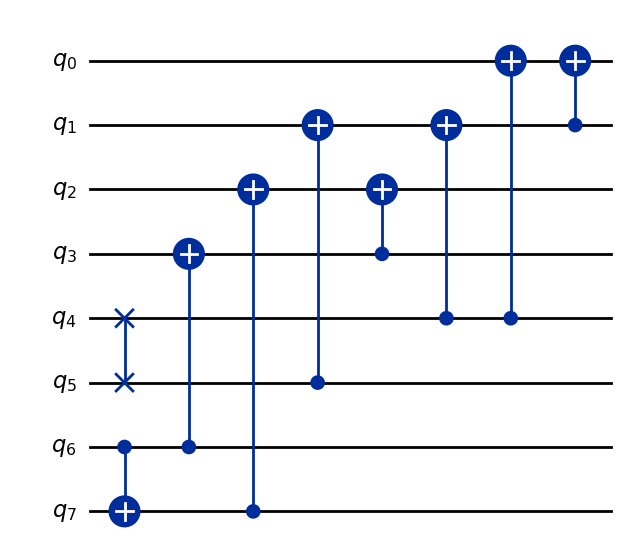

In [9]:
# logical circuit
log_act, phys_circ = circuits[0]
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical action 2

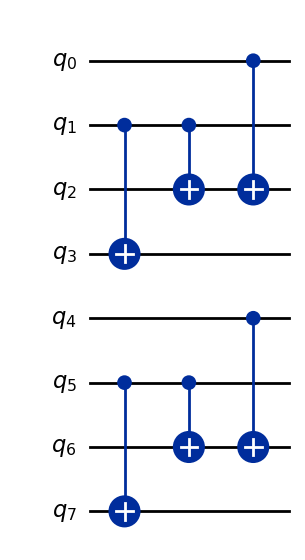

In [10]:
# logical circuit
log_act, phys_circ = circuits[1]
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical action 3

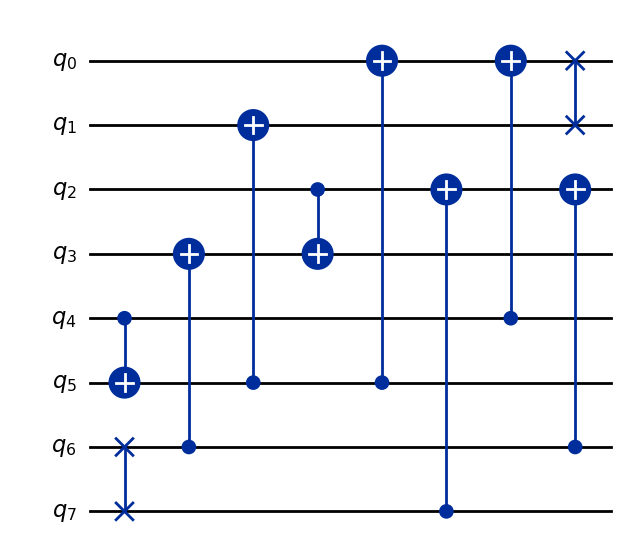

In [11]:
# logical circuit
log_act, phys_circ = circuits[2]
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical action 4

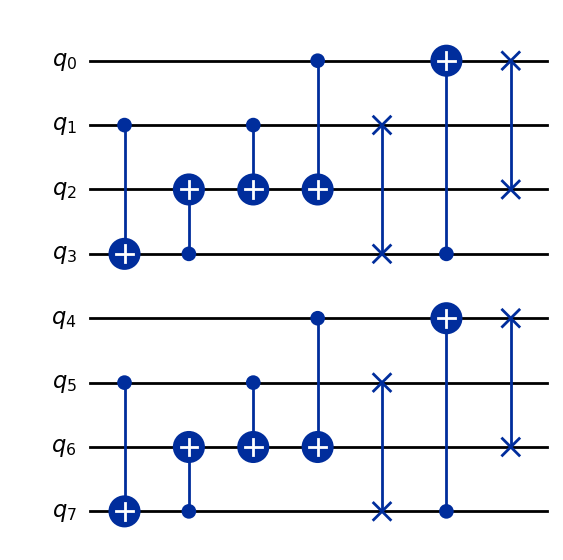

In [12]:
# logical circuit
log_act, phys_circ = circuits[3]
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical action 5

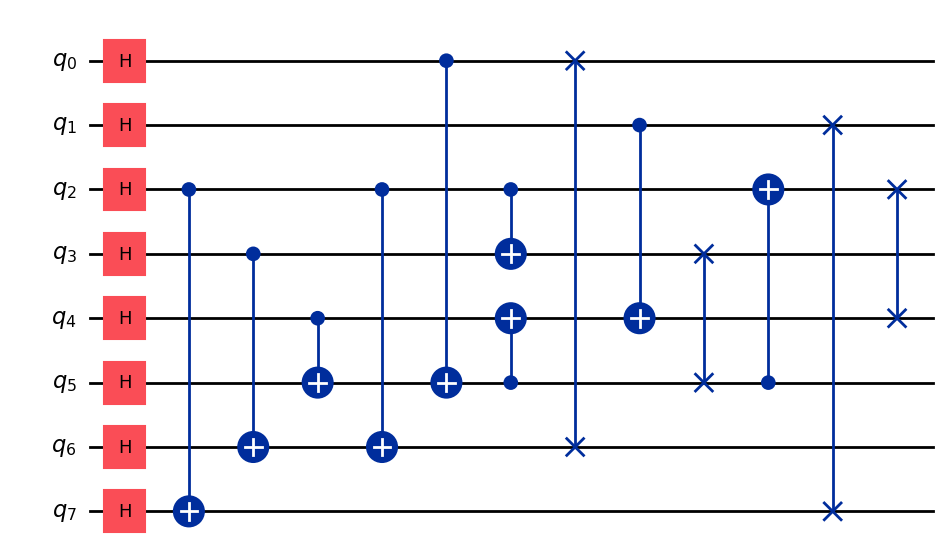

In [13]:
# logical circuit
log_act, phys_circ = circuits[4]
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')